# Feature importance in predicting a negative NPS response


## import packages


In [20]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
from pathlib import Path
import matplotlib.pyplot as plt


## Load / Transform NPS data 

In [21]:
nps = pd.read_csv('../../Desktop/nps_file.csv').drop(columns=['Feedback Id', 'Order Gmv'])

nps.columns = nps.columns.str.replace(' ', '')


nps.head(2)

,LeftDetractorResponse,SingleSuborder,OrderType,OrderIsWl,OrderIsUser,OrderIsGift,OrderIsEgiftRedemption,GifterStatus,UserStatus
0,True,True,New Platform,False,guest,self,False,never_gifter,blend_user
1,False,True,New Platform,False,guest,self,False,never_gifter,never_user


  ### Convert dtypes

In [13]:

# Convert the categorical columns to category data type

categorical_columns = ['OrderType',
                     'OrderIsUser',
                     'OrderIsGift',
                     'GifterStatus',
                     'UserStatus'
]

for col in categorical_columns:
    nps[col] = nps[col].astype("category")


# Convert the boolean columns to bool data type    
bool_columns = ['LeftDetractorResponse',
                'SingleSuborder',
                'OrderIsWl',
                'OrderIsEgiftRedemption',
                
]

for col in bool_columns:
    nps[col] = nps[col].astype('bool')



## Split data

In [14]:

X = nps.drop(columns='LeftDetractorResponse')
y = nps.LeftDetractorResponse

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 8)



[nps.shape for nps in (X_train, X_test, y_train, y_test)]

[(9324, 7), (2332, 7), (9324,), (2332,)]

### Not sure what this next step is doing
#### copied from a tutorial on training xgboost model

In [15]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder',TargetEncoder()),
    ('clf',XGBClassifier(random_state=8))
]

pipe = Pipeline(steps=estimators)

## Train XGBoost model

#### I copied this code from our hackathon, and I am not sure what each step is doing

In [16]:
# Specify the model hyperparameters
params={ 'objective': 'binary:logistic',
        "eval_metric": "auc", #"logloss",
        "tree_method": 'hist',
        "n_estimators": 100,
        "max_depth": 5,
        "early_stopping_rounds": 10,
        "verbosity": 1
       }

In [17]:
clf = xgb.XGBClassifier(**params, enable_categorical=True)
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)
# clf.save_model(Path(saved_models_path, f"xgboost_categorical_model_{current_time}.json"))

[0]	validation_0-auc:0.56268
[1]	validation_0-auc:0.56304
[2]	validation_0-auc:0.56327
[3]	validation_0-auc:0.56204
[4]	validation_0-auc:0.56408
[5]	validation_0-auc:0.56265
[6]	validation_0-auc:0.56333
[7]	validation_0-auc:0.56366
[8]	validation_0-auc:0.56133
[9]	validation_0-auc:0.56108
[10]	validation_0-auc:0.56289
[11]	validation_0-auc:0.56355
[12]	validation_0-auc:0.56667
[13]	validation_0-auc:0.56578
[14]	validation_0-auc:0.56581
[15]	validation_0-auc:0.56686
[16]	validation_0-auc:0.56596
[17]	validation_0-auc:0.56595
[18]	validation_0-auc:0.56604
[19]	validation_0-auc:0.56349
[20]	validation_0-auc:0.56363
[21]	validation_0-auc:0.56378
[22]	validation_0-auc:0.56384
[23]	validation_0-auc:0.56329
[24]	validation_0-auc:0.56328


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=True, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
clf.feature_importances_

array([0.20076205, 0.06856543, 0.        , 0.08154932, 0.44544894,
       0.        , 0.20367427], dtype=float32)

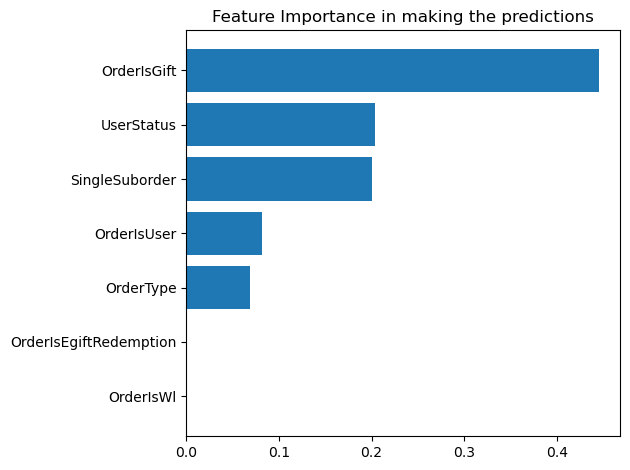

In [19]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.title("Feature Importance in making the predictions")
plt.tight_layout()

In [10]:




# should I avoid importing packages outside of a virtual env 
# estimator/pipe step 
# hyperparameter tuning? 